In [31]:
import pandas as pd

# Set to display ALL columns (no truncation)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Load the dataset
data = pd.read_csv(r"D:\Data_analytics_new\Sub5_Machine_Learning\Credit-Card-Fraud-Detection-Model\data\raw_data\fraudTrain.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [11]:
data["cc_num"].value_counts()

cc_num
4512828414983801773    3123
571365235126           3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
4734310647841293          7
4714017207228610634       7
6011732631674654          7
501894933032              7
4975457191020             7
Name: count, Length: 983, dtype: int64

In [7]:
data[data["cc_num"] == 4512828414983801773]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
70,70,2019-01-01 00:50:53,4512828414983801773,fraud_Jaskolski-Dibbert,grocery_net,16.16,Monica,Cohen,F,864 Reynolds Plains,Uledi,PA,15484,39.8936,-79.7856,328,Tree surgeon,1983-07-25,514a1b5251ca91aeab8994cf6253f04b,1325379053,39.222743,-78.839099,0
365,365,2019-01-01 04:45:43,4512828414983801773,fraud_Rau and Sons,grocery_pos,124.70,Monica,Cohen,F,864 Reynolds Plains,Uledi,PA,15484,39.8936,-79.7856,328,Tree surgeon,1983-07-25,12edfc2306c9e242adccce59a838cbac,1325393143,39.088298,-79.538272,0
532,532,2019-01-01 06:56:09,4512828414983801773,fraud_Cummings LLC,gas_transport,56.50,Monica,Cohen,F,864 Reynolds Plains,Uledi,PA,15484,39.8936,-79.7856,328,Tree surgeon,1983-07-25,190fa28329f4fdcd9cb058cab9b95f0a,1325400969,39.039511,-79.474965,0
1144,1144,2019-01-01 13:49:05,4512828414983801773,"fraud_Yost, Schamberger and Windler",kids_pets,65.96,Monica,Cohen,F,864 Reynolds Plains,Uledi,PA,15484,39.8936,-79.7856,328,Tree surgeon,1983-07-25,7d953673c09de0b9d5723d81d2a8d078,1325425745,40.600949,-79.847831,0
1477,1477,2019-01-01 16:15:08,4512828414983801773,fraud_Bode-Rempel,kids_pets,10.24,Monica,Cohen,F,864 Reynolds Plains,Uledi,PA,15484,39.8936,-79.7856,328,Tree surgeon,1983-07-25,73d738e8c0fc38f9da65df7a847638e1,1325434508,39.337320,-80.483926,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295329,1295329,2020-06-21 00:15:01,4512828414983801773,"fraud_Raynor, Reinger and Hagenes",gas_transport,79.40,Monica,Cohen,F,864 Reynolds Plains,Uledi,PA,15484,39.8936,-79.7856,328,Tree surgeon,1983-07-25,e4c49191b367789b7a88e71b75a1e84f,1371773701,39.628068,-80.254856,0
1295385,1295385,2020-06-21 00:51:00,4512828414983801773,"fraud_Olson, Becker and Koch",gas_transport,88.05,Monica,Cohen,F,864 Reynolds Plains,Uledi,PA,15484,39.8936,-79.7856,328,Tree surgeon,1983-07-25,59ae92b8331477a979ba80cf0715cb60,1371775860,40.860774,-79.295166,0
1295387,1295387,2020-06-21 00:53:06,4512828414983801773,fraud_Prohaska-Murray,gas_transport,32.86,Monica,Cohen,F,864 Reynolds Plains,Uledi,PA,15484,39.8936,-79.7856,328,Tree surgeon,1983-07-25,8ee5d63979659936ec3b07dd0e528bd3,1371775986,39.336810,-80.254318,0
1295592,1295592,2020-06-21 02:51:15,4512828414983801773,"fraud_Lockman, West and Runte",grocery_pos,111.76,Monica,Cohen,F,864 Reynolds Plains,Uledi,PA,15484,39.8936,-79.7856,328,Tree surgeon,1983-07-25,e945dde573810ecf030dd3873084af25,1371783075,40.782689,-80.285361,0


#### Univariate Analysis

In [12]:
### cc_num is the unique id for the transactions
df = data.copy()

In [13]:
df["cc_num"] = "CN - " + df["cc_num"].astype(str)

In [18]:
df["merchant"].nunique()

693

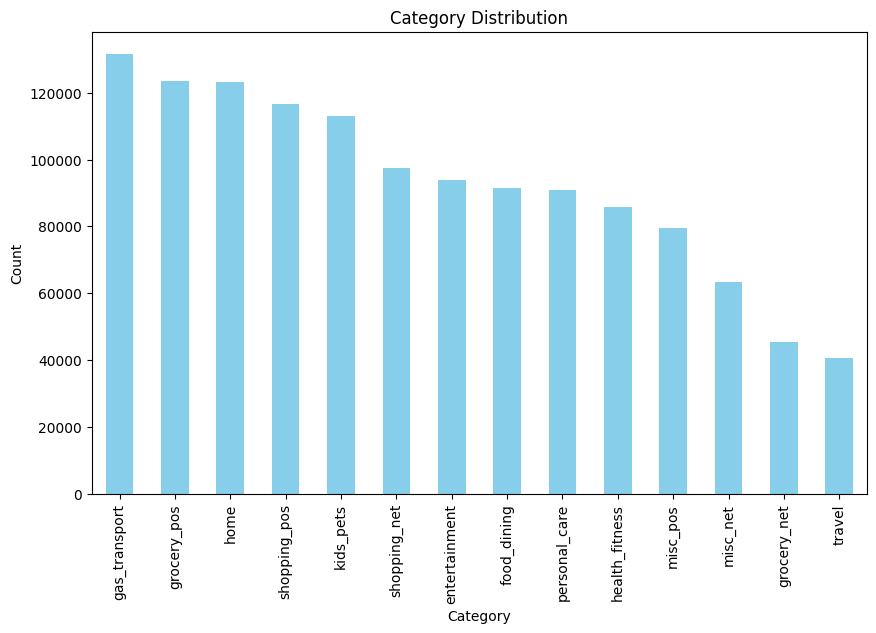

In [25]:
# Generate value counts
value_counts = df["category"].value_counts()

# Plot directly from Pandas
value_counts.plot(kind='bar', 
                  figsize=(10, 6),
                  title='Category Distribution',
                  xlabel='Category',
                  ylabel='Count',
                  color='skyblue')
plt.show()

In [26]:
print(df["amt"].min())
print(df["amt"].max())

1.0
28948.9


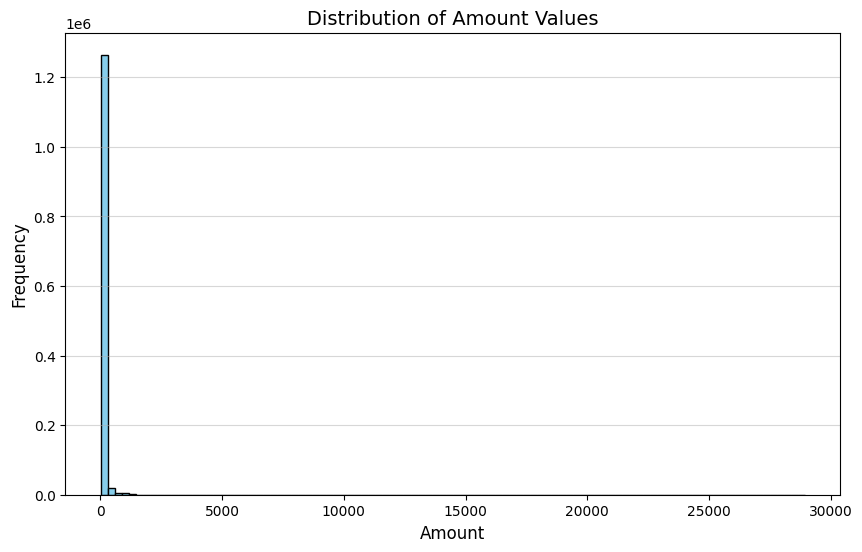

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df['amt'], bins=100, color='skyblue', edgecolor='black')

# Customizations
plt.title('Distribution of Amount Values', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5)

plt.show()

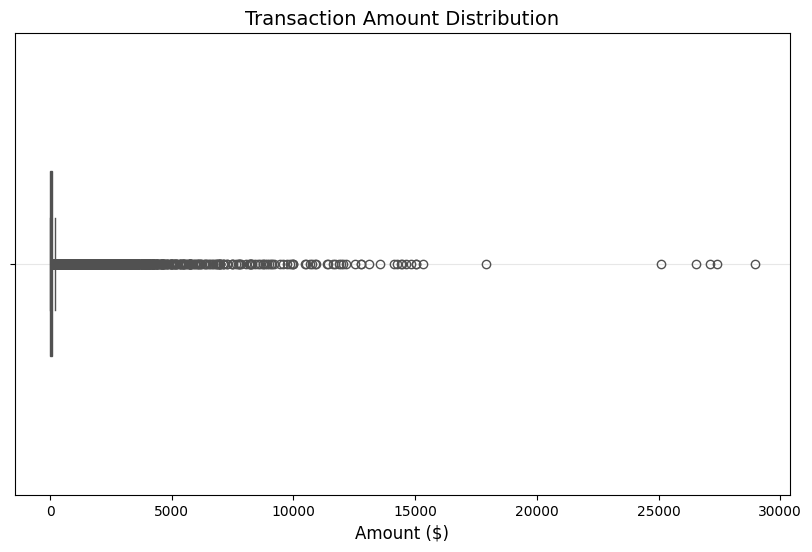

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['amt'], color='#3498db', width=0.4)

plt.title('Transaction Amount Distribution', fontsize=14)
plt.xlabel('Amount ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

In [33]:
df.describe()

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [34]:
### categorize the amount column

def create_bucket(x):
    if x<=5.00:
        return "less than 5 dollar"
    elif 5.00<x<=10.00:
        return "b/w 5 to 10 dollar"
    elif 10.00<x<=40.00:
        return "b/w 10 to 40 dollar"
    elif 40.00<x<=60.00:
        return "b/w 40 to 60 dollar"
    elif 60.00<x<=80.00:
        return "b/w 60 to 80 dollar"
    elif 80.00<x<=150.00:
        return "b/w 80 to 150 dollar"
    else:
        return "more than 150 dollar"

In [35]:
df["amount_bkt"] = df["amt"].apply(lambda x: create_bucket(x))

In [36]:
df["amount_bkt"].value_counts()

amount_bkt
b/w 10 to 40 dollar     246456
b/w 80 to 150 dollar    238566
b/w 40 to 60 dollar     186632
b/w 60 to 80 dollar     181879
b/w 5 to 10 dollar      173374
less than 5 dollar      162555
more than 150 dollar    107213
Name: count, dtype: int64

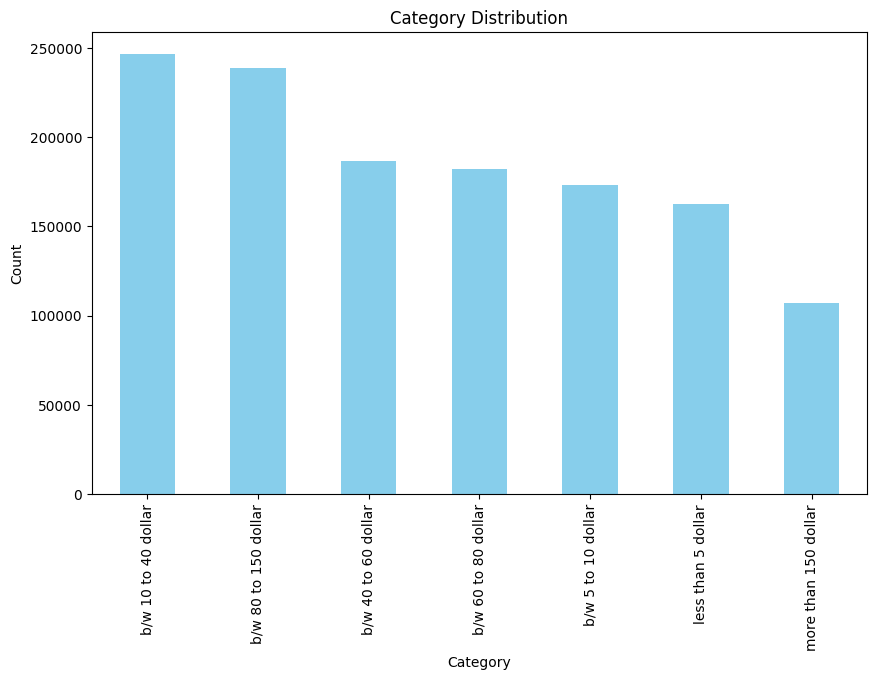

In [37]:
# Generate value counts
value_counts = df["amount_bkt"].value_counts()

# Plot directly from Pandas
value_counts.plot(kind='bar', 
                  figsize=(10, 6),
                  title='Category Distribution',
                  xlabel='Category',
                  ylabel='Count',
                  color='skyblue')
plt.show()

In [39]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'amount_bkt'],
      dtype='object')

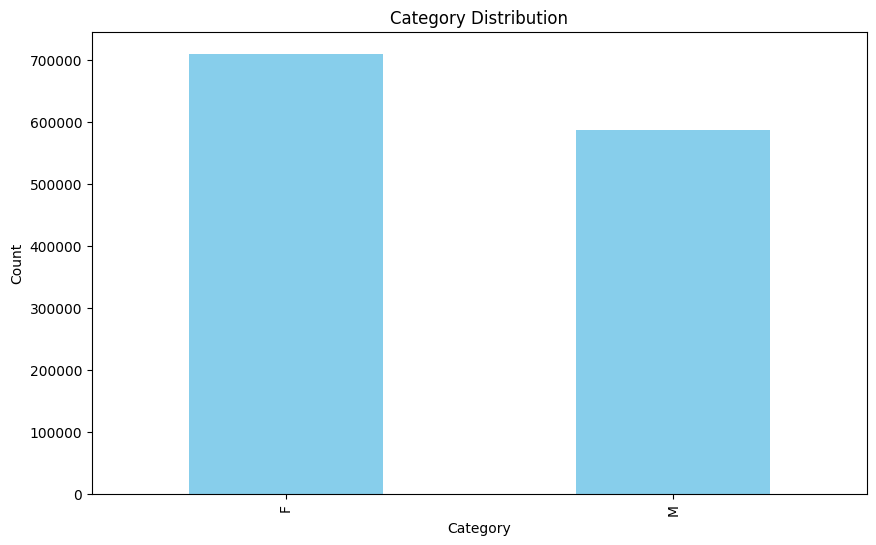

In [40]:
# Generate value counts
value_counts = df["gender"].value_counts()

# Plot directly from Pandas
value_counts.plot(kind='bar', 
                  figsize=(10, 6),
                  title='Category Distribution',
                  xlabel='Category',
                  ylabel='Count',
                  color='skyblue')
plt.show()

In [42]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amount_bkt
0,0,2019-01-01 00:00:18,CN - 2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,less than 5 dollar
1,1,2019-01-01 00:00:44,CN - 630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,b/w 80 to 150 dollar


In [43]:
df["city"].nunique()

894

In [44]:
df["state"].nunique()

51

In [46]:
df["zip"].value_counts()

zip
73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
23523       7
77027       7
95688       7
37411       7
Name: count, Length: 970, dtype: int64

In [47]:
df["lat"].value_counts()

lat
36.3850    3646
26.1184    3613
42.5164    3597
43.0048    3527
39.8936    3123
           ... 
41.1225       7
29.7396       7
35.0271       7
41.1165       7
41.0022       7
Name: count, Length: 968, dtype: int64

In [48]:
df['latitudinal_distance'] = abs(round(df['merch_lat']-df['lat'],3))
df['longitudinal_distance'] = abs(round(df['merch_long']-df['long'],3))

In [49]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amount_bkt,latitudinal_distance,longitudinal_distance
0,0,2019-01-01 00:00:18,CN - 2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,less than 5 dollar,0.068,0.870
1,1,2019-01-01 00:00:44,CN - 630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,b/w 80 to 150 dollar,0.271,0.024


In [51]:
#### City Population

df.describe()

,Unnamed: 0,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,latitudinal_distance,longitudinal_distance
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,5.002626e-01,5.003366e-01
std,3.743180e+05,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.885700e-01,2.888704e-01
min,0.000000e+00,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.241685e+05,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.500000e-01,2.500000e-01
50%,6.483370e+05,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,5.010000e-01,5.000000e-01
75%,9.725055e+05,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,7.500000e-01,7.510000e-01
max,1.296674e+06,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [68]:
def city_pop_cat(x):
    if x<=1000.00:
        return "Low_pop"
    elif 1000.00<x<=10000.00:
        return "Medium_pop"
    else:
        return "High_pop"

In [69]:
df["population_bkt"] = df["city_pop"].apply(lambda x: city_pop_cat(x))

In [70]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amount_bkt,latitudinal_distance,longitudinal_distance,population_bkt
0,0,2019-01-01 00:00:18,CN - 2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,less than 5 dollar,0.068,0.870,Medium_pop
1,1,2019-01-01 00:00:44,CN - 630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,b/w 80 to 150 dollar,0.271,0.024,Low_pop


In [71]:
df["population_bkt"].value_counts()

population_bkt
Medium_pop    509556
Low_pop       398055
High_pop      389064
Name: count, dtype: int64

In [72]:
#### Occupation
df["job"].value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Veterinary surgeon               8
Information officer              8
Contracting civil engineer       7
Ship broker                      7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

In [73]:
df["job"].nunique()

494

In [77]:
### Age

df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])
df['age']=df['trans_date']-df['dob']
df['age'] = (df['trans_date'] - df['dob']).dt.days / 365.25  # Accounts for leap years
df['age'] = df['age'].round(0).astype(int)  # Rounds ag

In [78]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amount_bkt,latitudinal_distance,longitudinal_distance,population_bkt,trans_date,age
0,0,2019-01-01 00:00:18,CN - 2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,less than 5 dollar,0.068,0.870,Medium_pop,2019-01-01,31
1,1,2019-01-01 00:00:44,CN - 630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,b/w 80 to 150 dollar,0.271,0.024,Low_pop,2019-01-01,41


In [79]:
df['trans_month'] = pd.DatetimeIndex(df['trans_date']).month
import calendar
df['Month_name'] = df['trans_month'].apply(lambda x: calendar.month_abbr[x])

In [86]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amount_bkt,latitudinal_distance,longitudinal_distance,population_bkt,trans_date,age,trans_month,Month_name
0,0,2019-01-01 00:00:18,CN - 2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,less than 5 dollar,0.068,0.870,Medium_pop,2019-01-01,31,1,Jan
1,1,2019-01-01 00:00:44,CN - 630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,b/w 80 to 150 dollar,0.271,0.024,Low_pop,2019-01-01,41,1,Jan


In [82]:
print(df["trans_date"].min())
print(df["trans_date"].max())


2019-01-01 00:00:00
2020-06-21 00:00:00


In [83]:
df["trans_num"].value_counts()

trans_num
0b242abb623afc578575680df30655b9    1
1f76529f8574734946361c461b024d99    1
a1a22d70485983eac12b5b88dad1cf95    1
6b849c168bdad6f867558c3793159a81    1
a41d7549acf90789359a9aa5346dcb46    1
                                   ..
440b587732da4dc1a6395aba5fb41669    1
278000d2e0d2277d1de2f890067dcc0a    1
483f52fe67fabef353d552c1e662974c    1
d667cdcbadaaed3da3f4020e83591c83    1
8f7c8e4ab7f25875d753b422917c98c9    1
Name: count, Length: 1296675, dtype: int64

In [84]:
df["unix_time"].value_counts()

unix_time
1335110521    4
1370050667    4
1370177227    4
1330179033    3
1349576597    3
             ..
1325376674    1
1325376754    1
1325376788    1
1325376877    1
1325376308    1
Name: count, Length: 1274823, dtype: int64

In [ ]:
### Target Variable : is fraud
## 1. Fraud
## 0. Authentic

df["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [89]:
df.tail(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amount_bkt,latitudinal_distance,longitudinal_distance,population_bkt,trans_date,age,trans_month,Month_name
1296673,1296673,2020-06-21 12:13:36,CN - 2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.9,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.24116,0,b/w 60 to 80 dollar,0.564,0.700,Medium_pop,2020-06-21,40,6,Jun
1296674,1296674,2020-06-21 12:13:37,CN - 4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.3,Jeffrey,Smith,M,135 Joseph Mountains,Sula,MT,59871,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.18611,0,less than 5 dollar,0.723,0.311,Low_pop,2020-06-21,25,6,Jun


In [88]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'amount_bkt',
       'latitudinal_distance', 'longitudinal_distance', 'population_bkt',
       'trans_date', 'age', 'trans_month', 'Month_name'],
      dtype='object')

In [90]:
df['transaction_time'] = df['trans_date_trans_time'].dt.time

# Create time buckets
bins = [0, 6, 12, 18, 24]
labels = ['12AM-6AM', '6AM-12PM', '12PM-6PM', '6PM-12AM']

# Convert hour to numeric (0-23) and apply binning
df['time_bucket'] = pd.cut(
    df['trans_date_trans_time'].dt.hour,
    bins=bins,
    labels=labels,
    right=False,  # Includes left edge, excludes right
    include_lowest=True
)

In [91]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amount_bkt,latitudinal_distance,longitudinal_distance,population_bkt,trans_date,age,trans_month,Month_name,transaction_time,time_bucket
0,0,2019-01-01 00:00:18,CN - 2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,less than 5 dollar,0.068,0.870,Medium_pop,2019-01-01,31,1,Jan,00:00:18,12AM-6AM
1,1,2019-01-01 00:00:44,CN - 630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,b/w 80 to 150 dollar,0.271,0.024,Low_pop,2019-01-01,41,1,Jan,00:00:44,12AM-6AM
2,2,2019-01-01 00:00:51,CN - 38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,more than 150 dollar,0.970,0.108,Medium_pop,2019-01-01,57,1,Jan,00:00:51,12AM-6AM
3,3,2019-01-01 00:01:16,CN - 3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,b/w 40 to 60 dollar,0.804,0.447,Medium_pop,2019-01-01,52,1,Jan,00:01:16,12AM-6AM
4,4,2019-01-01 00:03:06,CN - 375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,b/w 40 to 60 dollar,0.254,0.830,Low_pop,2019-01-01,33,1,Jan,00:03:06,12AM-6AM


In [92]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'amount_bkt',
       'latitudinal_distance', 'longitudinal_distance', 'population_bkt',
       'trans_date', 'age', 'trans_month', 'Month_name', 'transaction_time',
       'time_bucket'],
      dtype='object')

In [93]:
df_new = df[["trans_num","trans_date","time_bucket","cc_num","amount_bkt","category","gender","state","latitudinal_distance","longitudinal_distance",
             "population_bkt","age","is_fraud"]]

In [94]:
df_new.to_csv("..//data//cleaned_data//train_raw1.csv")